## TRABALHO DE IAA002 - Linguagem de Programação Aplicada
---

### Importação das Bibliotecas

In [1]:
# Biblioteca Pandas - Manipulação de dados
import pandas as pd
# Biblioteca Seaborn - Criação de gráficos
import seaborn as sns
# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# OPCIONAL - Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

---
### 1 Análise exploratória dos dados

#### a. Carregue a base de dados media_precos_carros_brasil.csv

In [2]:
# Função read_csv para importar os dados da pasta do computador
dados = pd.read_csv('database/precos_carros_brasil.csv')

In [3]:
# nº de linhas e colunas da tabela
linhas_inicial = dados.shape
linhas_inicial

(267542, 11)

#### b.1. Verifique se há valores faltantes nos dados. 

In [4]:

# Verificando se existem valores faltantes nos dados 
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [5]:
# Como em todas as colunas há o exato mesmo número de itens faltantes
# verificamos aqui se não são na verdade linhas com todos os dados faltentes
dados.isna().head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


##### b.2. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes.

In [6]:
# A melhor trarativa no caso é excluir as linhas com valores nulos
# O método dropna() remove as linhas que contêm valores nulos.
# axis=0 indica que estamos removendo as linhas com valores nulos.
dados.dropna(axis=0, inplace=True)


In [7]:
# Aqui verificamos se foram exclidos exatamente o valor acima das linhas com itens nulos.
# se o valor for igual, quer dizer só existiam linhas inteiras sem dados.

linhas_final = dados.shape
verifica_linhas = linhas_inicial[0] - linhas_final[0]
verifica_linhas


65245

In [8]:
#Verificando novamente se existem colunas com valores nulos.
dados.isna().any()

year_of_reference     False
month_of_reference    False
fipe_code             False
authentication        False
brand                 False
model                 False
fuel                  False
gear                  False
engine_size           False
year_model            False
avg_price_brl         False
dtype: bool

#### c. Verifique se há valores duplicados nos dados


In [9]:
# Verificando se temos valores duplicados
dados.duplicated().sum() 

2

# dúvida, será que precisa remover o valor duplicado?

In [10]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)

#### d.1. Crie duas categorias, para separar colunas numéricas e categóricas

In [11]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

#### d.2. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [12]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [13]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


#### e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)


In [14]:
# Contagem de valores por categoria de 'Modelo'
dados['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [15]:
# Contagem de valores por categoria de 'Marca'
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

#### f.Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados encontrados na Análise Exploratória dos dados
---

### 2 Visualização dos dados

#### a. Gere um gráfico da distribuição da quantidade de carros por marca


Text(0, 0.5, 'Total de carros')

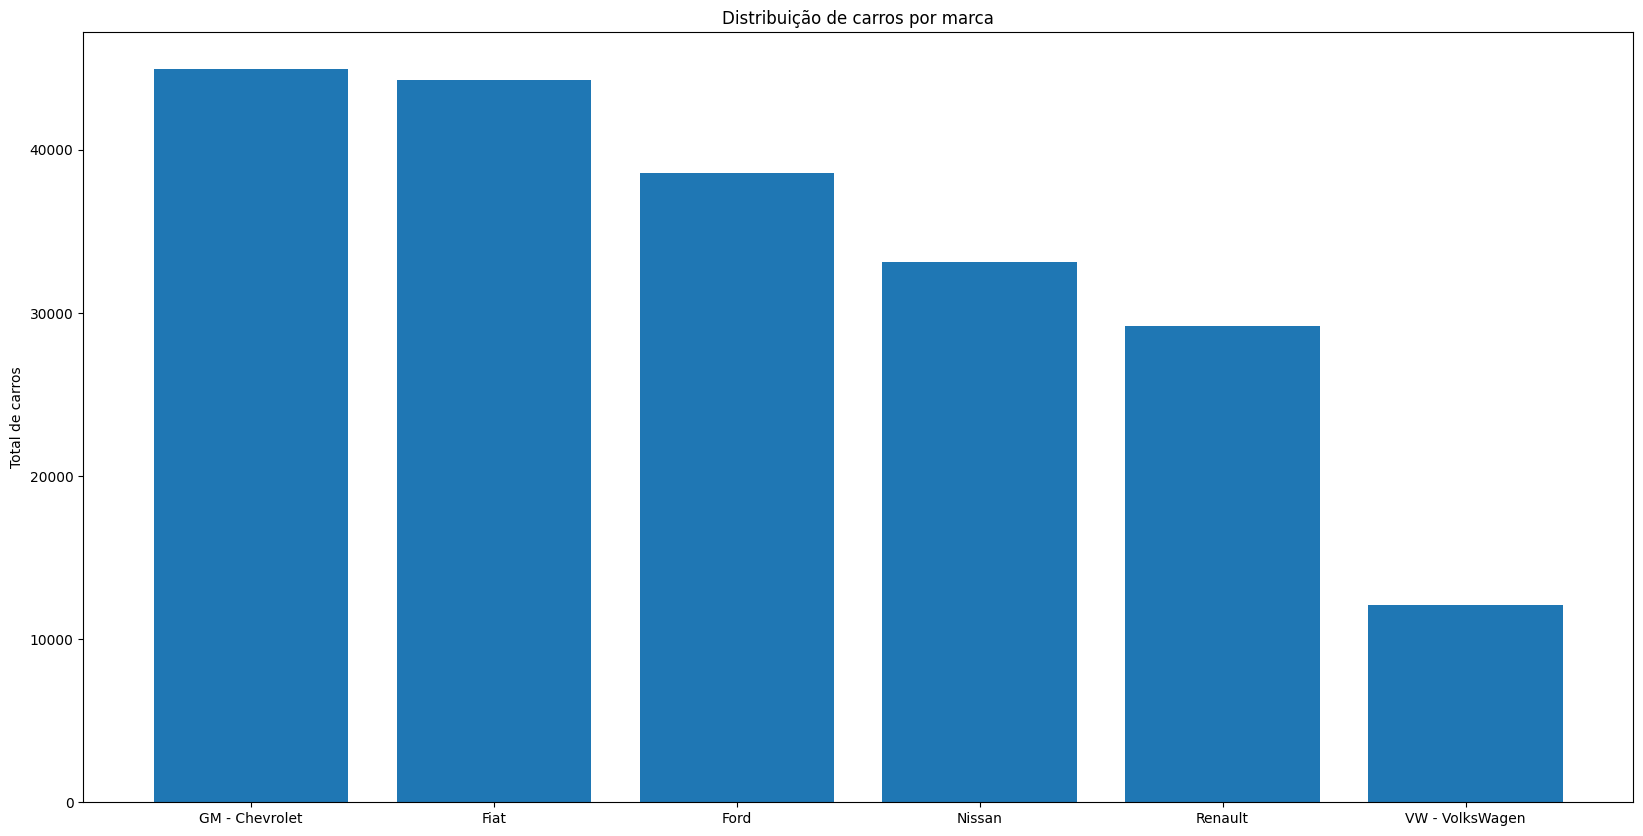

In [16]:
# Gráfico da distribuição quantidade de carros por marca.
plt.figure(figsize=(20,10))
plt.bar(dados['brand'].unique(), dados['brand'].value_counts()) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Distribuição de carros por marca') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros') # # plt.ylabel para inserir título no gráfico

#### b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

Text(0, 0.5, 'Total de carros')

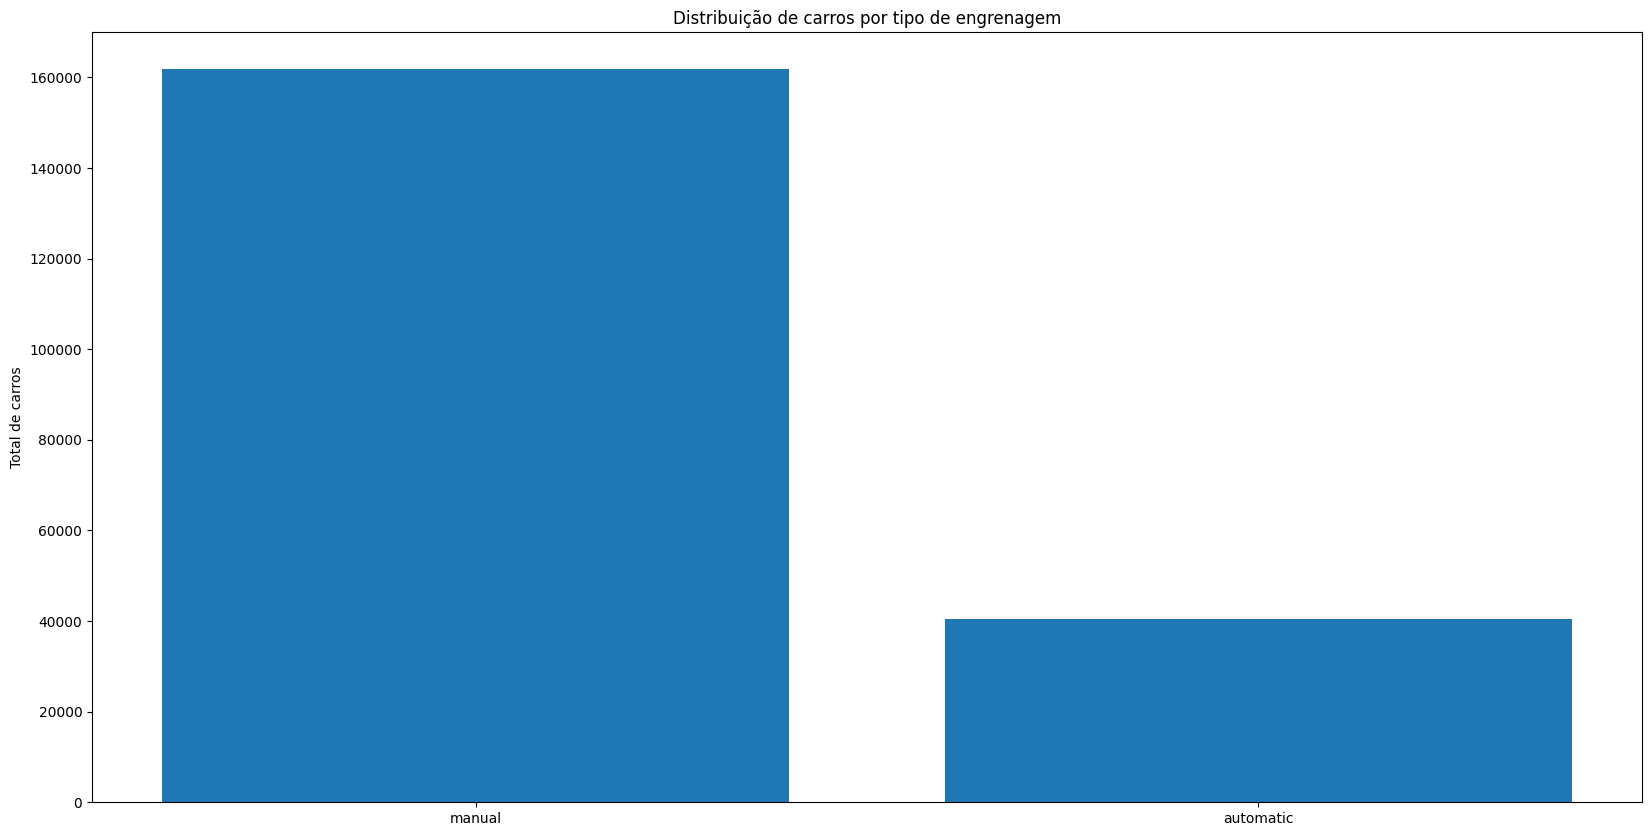

In [17]:
# Gráfico da distribuição quantidade de carros por marca.
plt.figure(figsize=(20,10))
plt.bar(dados['gear'].unique(), dados['gear'].value_counts()) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Distribuição de carros por tipo de engrenagem') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros') # # plt.ylabel para inserir título no gráfico

#### c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [34]:
# Filtrar dados para o ano de 2022
dados_2022 = dados[dados['year_of_reference'] == 2022]

# Agrupamento por mês das médias de preço
media_vendas_mes = dados.groupby('month_of_reference')['avg_price_brl'].mean().round(0)
media_vendas_mes.head()


month_of_reference
April       50849.0
August      53664.0
December    55848.0
February    49197.0
January     51905.0
Name: avg_price_brl, dtype: float64

In [39]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_vendas_mes = media_vendas_mes.reset_index(name='Preco Medio')
media_vendas_mes.head()

,month_of_reference,Preco Medio
0,April,50849.0
1,August,53664.0
2,December,55848.0
3,February,49197.0
4,January,51905.0


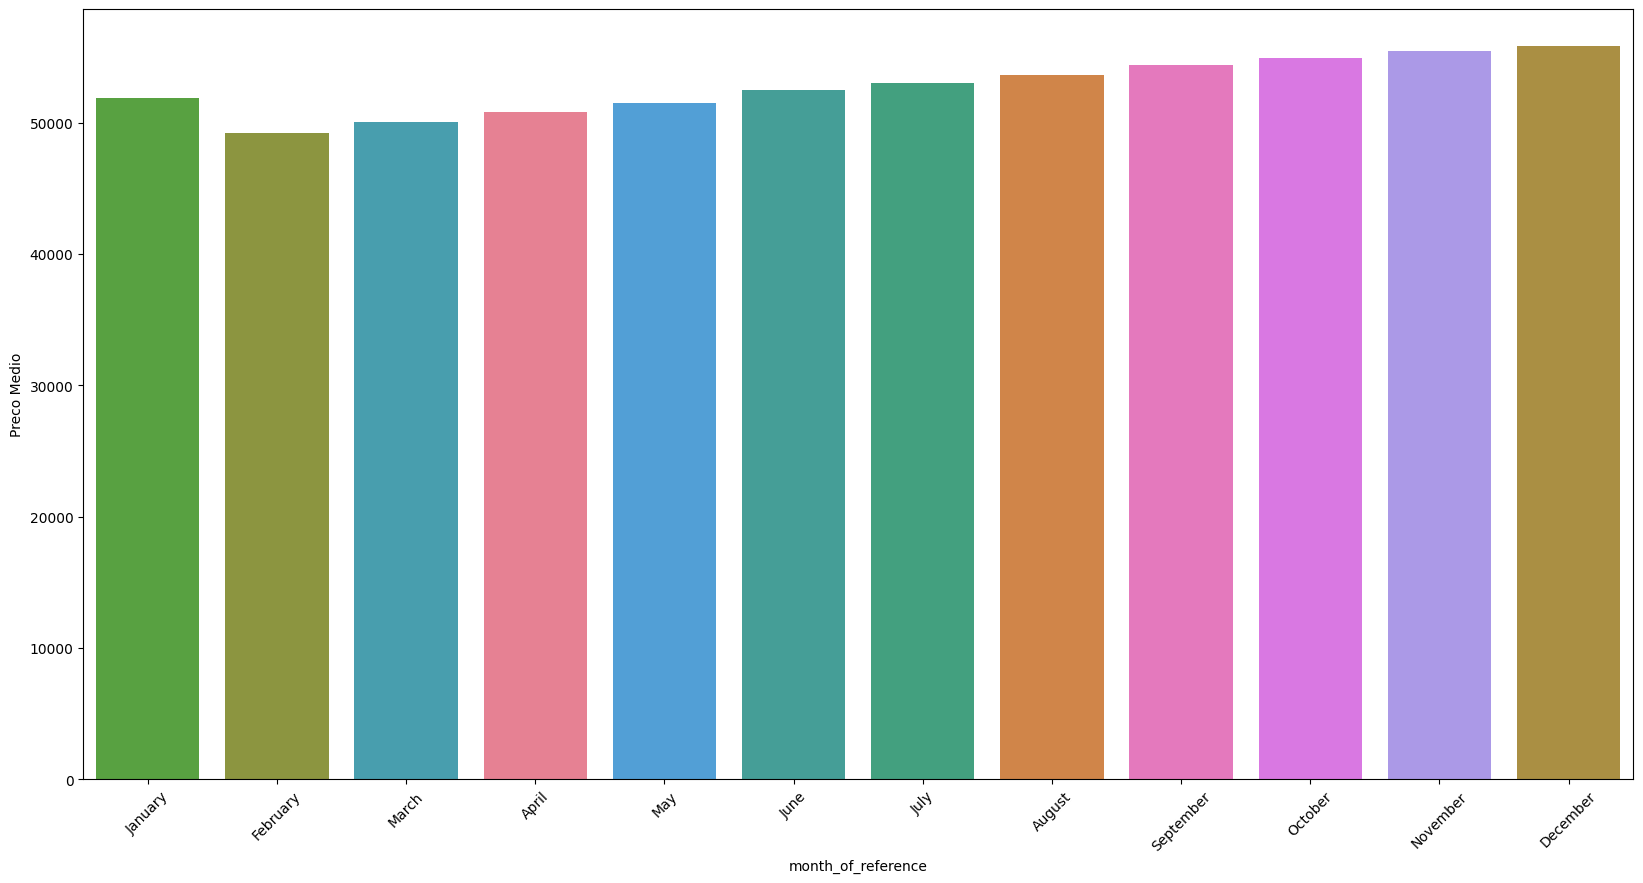

In [48]:
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='month_of_reference', y='Preco Medio', hue='month_of_reference' , data = media_vendas_mes, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )# falta ordenar por mês
plt.xticks(rotation=45);